#### << tf.keras.datasets.fashion_mnist.load_data를 모델을 적용해보자 >>
1) 28*28 픽셀을 가진 0~9까지 레이블과 이미지로 구성되었다
2) 10,000 개의 테스트 데이터 ,60,000개의 학습 데이터 구성되었다
3) 정규화 ,원핫인코딩
4) 모델을 생성 : 차원변환 28,28 -> 1차원 변환, 레이어 3개층 , relu(0~1) , softmax
   - softmax : 클래스 분류할때 확률로 변환해서 사용하는 함수 , 각 점수 벡터에 지수를 구한다음 정수상수로 나누어 총합을  1로 만든다

In [1]:
import tensorflow as tf 
import keras

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) =  keras.datasets.mnist.load_data()

In [3]:
#데이터 전처리 (정규화)
x_train,x_test = x_train/255.0 , x_test/255.0

In [4]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [5]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(1000,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax'),
        ])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
#모델 실행
import time
start_time = time.time()
history = model.fit(x_train, y_train , epochs =10, batch_size= 100, validation_data=(x_test,y_test))
print(f'fit_time : {time.time()-start_time}')

Epoch 1/10


600/600 [==============================] - 5s 7ms/step - loss: 0.2220 - accuracy: 0.9359 - val_loss: 0.1028 - val_accuracy: 0.9693
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0832 - accuracy: 0.9744 - val_loss: 0.0853 - val_accuracy: 0.9738
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0676 - val_accuracy: 0.9779
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0652 - val_accuracy: 0.9792
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0249 - accuracy: 0.9929 - val_loss: 0.0642 - val_accuracy: 0.9798
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0190 - accuracy: 0.9946 - val_loss: 0.0720 - val_accuracy: 0.9791
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0141 - accuracy: 0.9961 - val_loss: 0.0722 - val_accuracy: 0.9802
Epoc

In [7]:
import matplotlib.pyplot as plt

In [8]:
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9805


In [9]:
import numpy as np

res = model.predict(x_test)
res_label = np.argmax(res,axis=1)

print(f'예측 : {res_label[:10]}')
print(f'실제 값 : {y_test[:10]}')

313/313 [==============================] - 1s 1ms/step
예측 : [7 2 1 0 4 1 4 9 5 9]
실제 값 : [7 2 1 0 4 1 4 9 5 9]


In [10]:
#8 잘못된 데이터를 찾아보자
wrong_res = []

for n in range(0,len(y_test)):
    if res_label[n] != y_test[n]:
        wrong_res.append(res_label[n])
print(len(wrong_res))

195


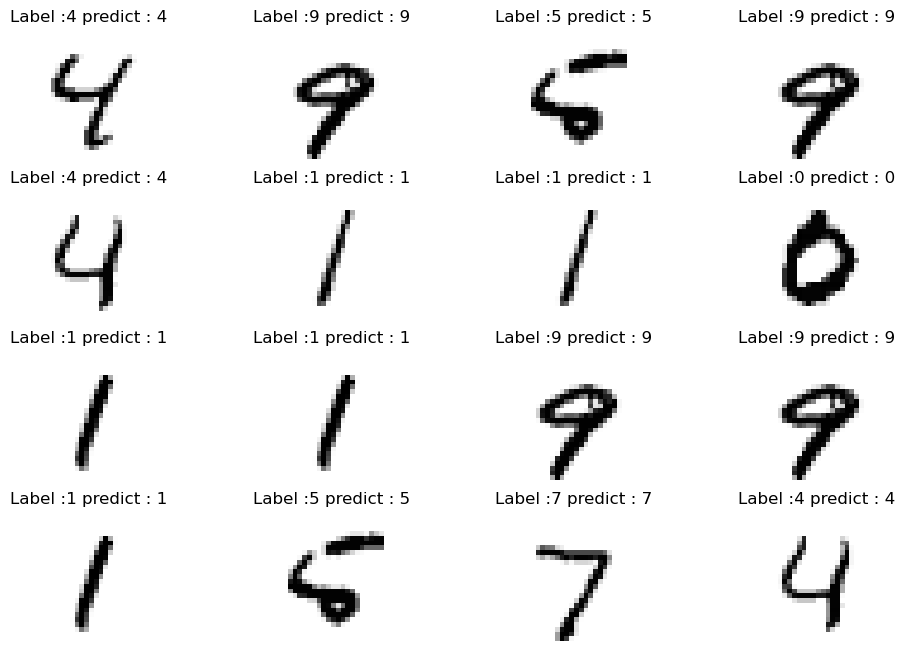

In [11]:
#잘못된 데이터의 개수를 확인하고 임의 추출해서 그래프로 다시 확인 해보자
import random
test = random.choices(wrong_res,k=16)

plt.figure(figsize =(12,8))

for idx,n in enumerate(test):
    plt.subplot(4,4,idx+1)
    plt.imshow(x_test[n].reshape(28,28) , cmap='Greys',interpolation = 'nearest')
    plt.title('Label :'+str(y_test[n]) + ' predict : ' + str(res_label[n]))
    plt.axis('off')

In [12]:
#정답률이 너무 낮다 개선점을 찾자 _전처리에서 정규화 -> 모형변경 -> 활성화 함수 변경 -> 최적화 학습률조정
